# Exploratory Data Analysis.

In [53]:
import json
import pandas as pd

import seaborn as sns

from process_security_libraries_dataset import load_security_libraries_df

#### Security libraries

In [54]:
security_libraries_df = load_security_libraries_df("../data/security_libraries_dependents_count.json")

In [55]:
security_libraries_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, 95 to 234
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   metadata_version          762 non-null    object
 1   name                      762 non-null    object
 2   version                   762 non-null    object
 3   summary                   760 non-null    object
 4   description               750 non-null    object
 5   description_content_type  708 non-null    object
 6   license                   479 non-null    object
 7   keywords                  527 non-null    object
 8   classifiers               762 non-null    object
 9   platform                  762 non-null    object
 10  requires_python           689 non-null    object
 11  requires                  762 non-null    object
 12  provides                  762 non-null    object
 13  obsoletes                 762 non-null    object
 14  requires_dist             762 

In [56]:
security_libraries_df.head()

,metadata_version,name,version,summary,description,description_content_type,license,keywords,classifiers,platform,...,sha256_digest,blake2_256_digest,license_files,rn,home_page,license_expression,repo_url,dependentCount,directDependentCount,indirectDependentCount
95,2.2,apiverve-appstorescraper,1.1.8,App Store Scraper is a simple tool for scrapin...,App Store Scraper API\r\n============\r\n\r\nA...,text/markdown,None,"app store, app data, app store data, app store...","[Development Status :: 5 - Production/Stable, ...",[],...,5e6ed7e8eb1ebe51d62600979e9aa54392dac845ef38ce...,96dcd3ad8b87c2d7c849427822177c81afa17dc89acd77...,[],1,None,None,https://github.com/apiverve/appstorescraper.Py...,0,0,0
664,2.4,securityscan,1.0.0,Comprehensive security analysis for Python pro...,# SecurityScan 🔒\n\n[![PyPI version](https://b...,text/markdown,MIT,"security, vulnerability, scanning, python, sta...","[Development Status :: 5 - Production/Stable, ...",[],...,01d1741c618ec403c3d95a1d6a9c04be3f6d72f8a388f1...,d656fbe0b95d66e0fc12291c5e5a92fdcf5d603a98f5d9...,[LICENSE],1,https://github.com/Sherin-SEF-AI/security-scan,None,https://github.com/Sherin-SEF-AI/security-scan,0,0,0
2,2.2,BinaryFileReader,3.0.4,This package reads binary file to exports stri...,![BinaryFileReader Logo](https://mauricelamber...,text/markdown,GPL-3.0 License,"strings, hexadecimal, hexadecimal-reader, bina...","[Topic :: System, Topic :: Security, Environme...",[Windows],...,503e42746429d452d507f37de3951c0fe853502bc2385f...,8c869620704dfcb8ad2e70394895d7c28758cc40f01f6a...,[],1,https://github.com/mauricelambert/BinaryFileRe...,None,https://github.com/mauricelambert/BinaryFileRe...,0,0,0
3,2.3,BlueSkySight,1.0.0,A client to gather vulnerability-related infor...,# BlueSkySight\n\nA client to gather vulnerabi...,text/markdown,GPL-3.0-or-later,"Vulnerability-Lookup, Vulnerability, CVE, Bluesky","[Development Status :: 5 - Production/Stable, ...",[],...,e1a82f863025610d82459a7347d57429a9ae3b927a8e22...,02af1aff45d1f42d2d44c5f686f143ef72f2f7242c9e80...,[],1,None,None,https://github.com/vulnerability-lookup/BlueSk...,0,0,0
4,2.4,ByteBomber,2.3.1,ZIP bomb generator (for educational purposes o...,ByteBomber is a Python tool for creating ZIP b...,text/markdown,MIT,None,"[Programming Language :: Python :: 3, License ...",[],...,f7f95b0ce749e12a7f27791dd6df8b239ff1d427029b60...,aec616e37355b589c1225e62c07a6e93b90a9d9d004dcc...,[LICENSE],1,None,None,https://github.com/redkitlab/ByteBomber,0,0,0


Estimated dependents count

<Axes: xlabel='dependentCount', ylabel='Count'>

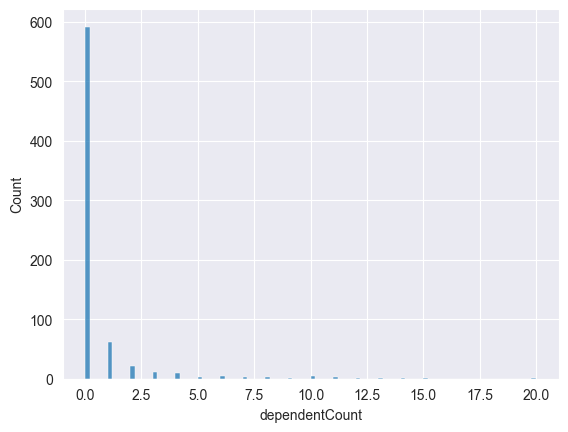

In [57]:
sns.histplot(data=security_libraries_df, x="dependentCount", bins=100, binrange=(0, 20))

In [58]:
for min_dependents in [1, 10, 100]:
    print(f"{security_libraries_df[security_libraries_df["dependentCount"] >= min_dependents].shape[0]} libraries have at least {min_dependents} dependents.")

170 libraries have at least 1 dependents.
52 libraries have at least 10 dependents.
19 libraries have at least 100 dependents.


#### security libraries dependents, and exact counts

In [59]:
with open("../data/security_libraries_dependents.json", "r", encoding="utf-8") as f:
    dependents_json = json.load(f)


In [60]:
dependents_counts_df = pd.DataFrame([(lib, dependents_data["dependents_count"]) for lib, dependents_data in dependents_json.items()])
dependents_counts_df.columns = ["library", "dependents_count"]
dependents_counts_df.sort_values(by="dependents_count", ascending=False, inplace=True)

In [61]:
dependents_counts_df

,library,dependents_count
761,cryptography,408742
760,pycryptodome,59129
758,pyOpenSSL,36639
759,paramiko,27404
752,bandit,23838
...,...,...
49,RecordFlux,0
47,Pyfhel,0
46,sipg,0
45,simplesecurity,0


In [62]:
dependents_counts_df.value_counts(subset=["dependents_count"])

dependents_count
0                   441
2                    78
3                    33
11                   16
4                    15
                   ... 
23838                 1
27404                 1
36639                 1
59129                 1
408742                1
Name: count, Length: 115, dtype: int64

In [63]:
for min_dependents in [1, 10, 100, 1000]:
    print(f"{int((dependents_counts_df["dependents_count"] >= min_dependents).sum())} libraries have at least {min_dependents} dependents.")

321 libraries have at least 1 dependents.
149 libraries have at least 10 dependents.
59 libraries have at least 100 dependents.
30 libraries have at least 1000 dependents.


<Axes: ylabel='Count'>

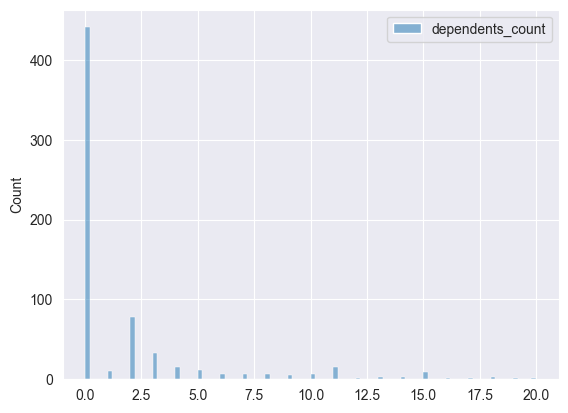

In [64]:
sns.histplot(dependents_counts_df, bins=100, binrange=(0, 20))